In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools

In [17]:
# HOME = os.path.join('/content','drive','Othercomputers','MY Laptop','Computer Vision')
HOME = '/content/drive/Othercomputers/My Laptop/Computer Vision'
print(HOME)
os.listdir(HOME)

/content/drive/Othercomputers/My Laptop/Computer Vision


['Images',
 '.vs',
 'FeatureMatching.py',
 'Feature_Matching.ipynb',
 'email.ipynb',
 'TestBoard1.jpeg',
 'TestBoard2.jpeg',
 'TestBoard3.jpeg',
 'TestBoard4.png',
 'ExtractChessBoard.ipynb',
 '.ipynb_checkpoints',
 'Dataset',
 'Untitled.ipynb']

In [12]:
!pwd

/content


In [18]:
classes = [x for x in os.listdir(os.path.join(HOME,'Dataset')) if x[0]=='B' or x[0]=='W']
classes

['B-Bishop',
 'B-King',
 'B-Knight',
 'B-Pawn',
 'B-Queen',
 'B-Rook',
 'W-Bishop',
 'W-King',
 'W-Knight',
 'W-Pawn',
 'W-Queen',
 'W-Rook']

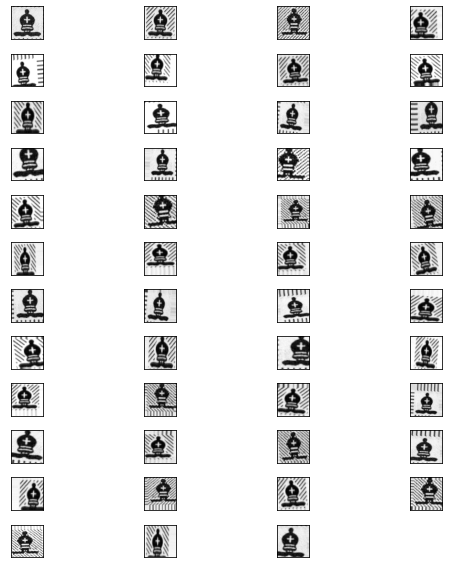

In [24]:
fig = plt.figure(figsize=(8,8))
i = 1
for class_name in classes:
    for name,direc,files in os.walk(HOME+"/Dataset/"+class_name):
        for file in files:
            filename = os.path.join(name,file)
            # print(filename)
            img = cv2.resize(cv2.imread(filename,0),(64,64))
            fig.add_subplot(12, 4, i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img,cmap='gray')
            i+=1
            if(i==48):
              break
    if(i==48):
        break
plt.tight_layout()
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=5, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        shear_range=0.1,
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
for class_name in classes:
    for name,direc,files in os.walk(class_name):
        images = []
        for file in files:
            filename = os.path.join(name,file)
#             print(filename)
            img = cv2.resize(cv2.imread(filename,0),(64,64))
            images.append(img.reshape(64,64,1))
#         print(np.array(images).shape)
        aug_iter = datagen.flow(np.array(images), batch_size=4)
        for i in range(300):
            image = next(aug_iter)[0].astype('uint8')
            cv2.imwrite(os.path.join(name,"img{}.jpeg".format(i+4)),image)

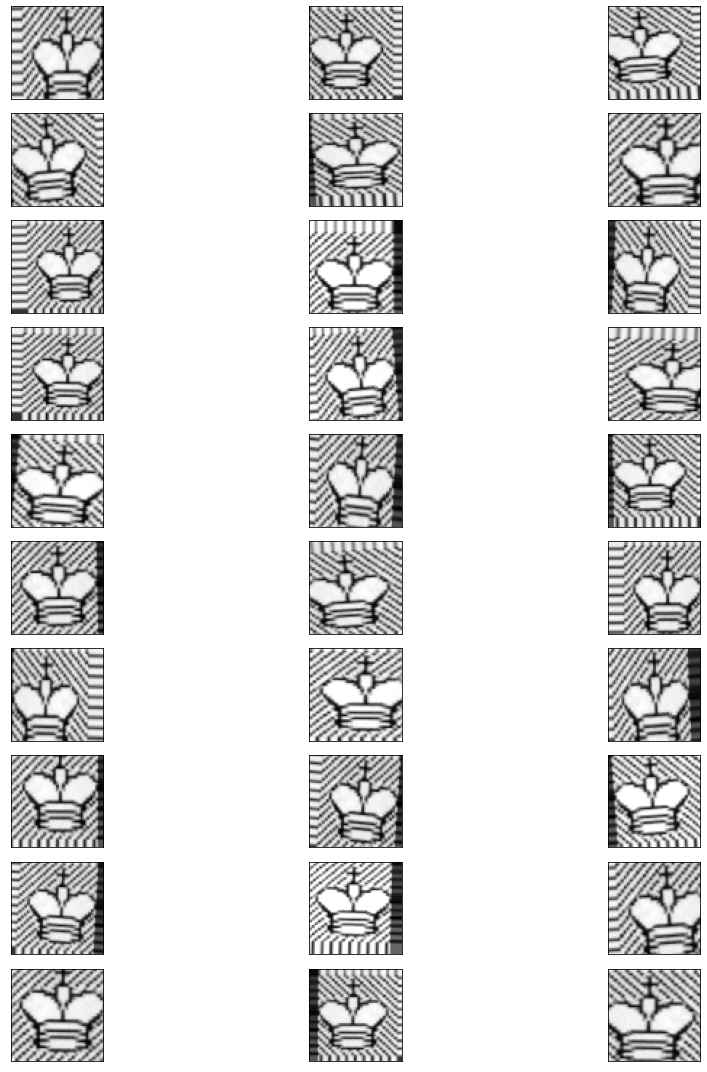

In [ ]:
fig = plt.figure(figsize=(15,15))
filename = 'W-King\img1.jpeg'
img = cv2.resize(cv2.imread(filename,0),(64,64))
aug_iter = datagen.flow(np.reshape(np.array([img]),(1,64,64,1)), batch_size=1)
for i in range(30):
    image = next(aug_iter)[0].astype('int')
    fig.add_subplot(10, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image,cmap='gray')
#     cv2.imwrite("Rook{}.jpg".format(i+1),image)
fig.tight_layout()
plt.show()

In [ ]:
for class_name in classes:
    for name,direc,files in os.walk(class_name):
#         images = []
        for file in files:
            filename = os.path.join(name,file)
#             print(file)
            if(file not in ['img1.jpeg','img2.jpeg','img3.jpeg']):
                os.remove(filename)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD,Adam
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Dense, Dropout, AveragePooling2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Softmax, concatenate,add, ReLU, Input
import tarfile
import random, shutil

In [39]:
train_datagen = ImageDataGenerator(
        rotation_range=2, # rotation
        # width_shift_range=0.1, # horizontal shift
        # height_shift_range=0.1, # vertical shift
        zoom_range=0.1, # zoom
        # shear_range=0.1,
        horizontal_flip=True, # horizontal flip
        # brightness_range=[0.2,1.2],
        validation_split=0.2) # brightness

train_generator = train_datagen.flow_from_directory(
    "/content/Dataset/",
    target_size=(64,64),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
valid_generator = train_datagen.flow_from_directory(
    "/content/Dataset/",
    target_size=(64,64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 2917 images belonging to 12 classes.
Found 720 images belonging to 12 classes.


In [41]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), padding='valid',input_shape=train_generator.image_shape,activation='relu' ))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu' ))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(12,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_7 (Dense)              (None, 12)               

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
!cp -r '/content/drive/Othercomputers/My Laptop/Computer Vision/Dataset' '/content/Dataset'

In [47]:
history = model.fit(
    x = train_generator,
    validation_data = valid_generator,
    epochs = 5,
    verbose=1)

Epoch 1/5
183/183 [==============================] - 8s 43ms/step - loss: 0.0318 - accuracy: 0.9925 - val_loss: 0.1507 - val_accuracy: 0.9847
Epoch 2/5
183/183 [==============================] - 8s 43ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.1144 - val_accuracy: 0.9750
Epoch 3/5
183/183 [==============================] - 8s 43ms/step - loss: 0.0586 - accuracy: 0.9897 - val_loss: 0.9882 - val_accuracy: 0.9278
Epoch 4/5
183/183 [==============================] - 8s 42ms/step - loss: 0.3384 - accuracy: 0.9541 - val_loss: 0.8277 - val_accuracy: 0.8847
Epoch 5/5
183/183 [==============================] - 8s 42ms/step - loss: 0.2640 - accuracy: 0.9712 - val_loss: 0.3485 - val_accuracy: 0.9611


In [33]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
train_generator.image_shape

(64, 64, 3)

In [45]:
def plot_graph(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [46]:
plot_graph(history,20)

NameError: ignored

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [49]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['B-Bishop', 'B-King', 'B-Knight', 'B-Pawn', 'B-Queen', 'B-Rook', 'W-Bishop', 'W-King', 'W-Knight', 'W-Pawn', 'W-Queen', 'W-Rook']


Confusion Matrix
Normalized confusion matrix


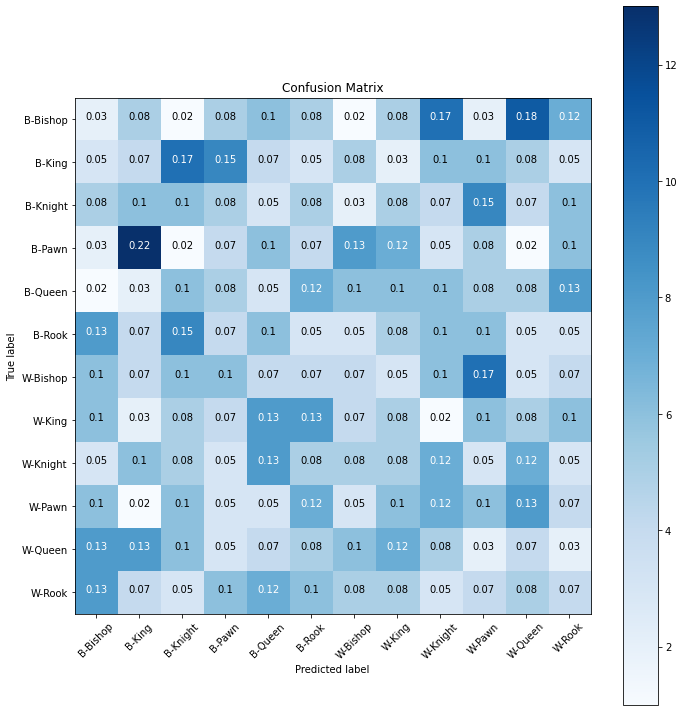

In [52]:
Y_pred = model.predict(valid_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(valid_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [54]:
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))

Confusion Matrix
[[ 2  9  2  6  4  8  1  6  6  4  3  9]
 [ 1  6  4  5  4  6  9  2 10  4  7  2]
 [ 4  4  4  2  4  8  4  6  8  4  6  6]
 [ 6  4  3  5  6  4  5  8  4  5  4  6]
 [11  6  6  6  5  2  5  1  5  4  6  3]
 [ 5  2 13  4  3  4  5  9  2  7  4  2]
 [ 6  6  7  3  6  9  4  2  2  3  7  5]
 [ 2  3  3  3  6  3  6  6  7 11  6  4]
 [ 2  7  6  5  5  4  5  7  5  5  5  4]
 [ 9  2  4  5  7  5  4  4  1  5  4 10]
 [ 9  5  5  5  4  3  4  8  8  4  4  1]
 [ 2  5 10  3  6  3  3  3  7  5  8  5]]


In [64]:
img = cv2.resize(cv2.imread('/content/Dataset/W-Rook/img102.jpeg'),(64,64))

In [72]:
img = cv2.resize(cv2.imread('/content/drive/Othercomputers/My Laptop/Computer Vision/TEST/W-Knight.jpeg'),(64,64))

In [73]:
pred = model.predict(img.reshape(1,64,64,3))
print(np.argmax(pred, axis=1))

[8]
